In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing and Exploring Dataset

In [4]:
rawdata = pd.read_excel('c://Users//Matthew//DA//Activities//midproject//MB_House_Pricing_Regression//regression_data.xls')

In [3]:
pd.set_option('display.max_columns',None)
rawdata.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
rawdata.shape

(21597, 21)

In [5]:
rawdata.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [6]:
cleandata = rawdata
cleandata.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [257]:
rawdata.shape

(21597, 21)

In [7]:
cleandata=cleandata.drop_duplicates()
cleandata.shape

(21597, 21)

In [21]:
i=2
for col in cleandata.columns:
    print('For column ',col,',the counts are:',cleandata[col].value_counts())
    i+=1

For column  date ,the counts are: 2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-05-17      1
2014-07-27      1
2014-08-03      1
2014-11-02      1
2015-05-24      1
Name: date, Length: 372, dtype: int64
For column  bedrooms ,the counts are: 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64
For column  bathrooms ,the counts are: 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64
For column  sqft_living ,the counts are: 1300    138
1400    135
1440    133
1010    

In [9]:
# checking to see if there are multiple instances of the same id
cleandata[cleandata['id']==795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [8]:
cleandata=cleandata[~cleandata['bedrooms'].isin([33])]
cleandata.shape

(21596, 21)

In [63]:
#confirming outlier is removed
cleandata[ (cleandata['bedrooms']== 33) ]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [10]:
cleandata=cleandata.drop(['id'],axis=1)

In [64]:
cleandata.sort_values(by=['date'])

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15113,2014-05-02,2,1.00,850,6174,1.0,0,0,4,7,850,0,1950,0,98155,47.7352,-122.328,1100,6174,308500
2485,2014-05-02,2,2.00,1350,2560,1.0,0,0,3,8,1350,0,1976,0,98052,47.6344,-122.107,1790,2560,335000
12484,2014-05-02,2,1.00,800,4850,1.0,0,0,4,7,800,0,1944,0,98107,47.6639,-122.364,1150,4365,440000
4959,2014-05-02,3,1.75,2330,14892,1.0,0,0,3,8,1970,360,1980,0,98074,47.6267,-122.046,2570,14217,588500
18675,2014-05-02,5,2.50,2210,9655,1.0,0,0,3,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633,470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20456,2015-05-14,5,3.00,3223,6371,2.0,0,0,3,9,3223,0,2014,0,98042,47.3584,-122.163,1979,9008,479349
927,2015-05-14,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090,359000
5632,2015-05-15,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000
13040,2015-05-24,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500


In [11]:
def daycount(x):
    period = pd.Period(x,freq='D')
    if period.year == 2014:
        return period.day_of_year - 122
    elif period.year == 2015:
        return period.day_of_year+243

In [12]:
cleandata['day']=list(map(daycount,cleandata['date']))

In [31]:
#checking day column follows order of date column
cleandata.sort_values(by=['date'])

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day
15113,2014-05-02,2,1.00,850,6174,1.0,0,0,4,7,850,0,1950,0,98155,47.7352,-122.328,1100,6174,308500,0
2485,2014-05-02,2,2.00,1350,2560,1.0,0,0,3,8,1350,0,1976,0,98052,47.6344,-122.107,1790,2560,335000,0
12484,2014-05-02,2,1.00,800,4850,1.0,0,0,4,7,800,0,1944,0,98107,47.6639,-122.364,1150,4365,440000,0
4959,2014-05-02,3,1.75,2330,14892,1.0,0,0,3,8,1970,360,1980,0,98074,47.6267,-122.046,2570,14217,588500,0
18675,2014-05-02,5,2.50,2210,9655,1.0,0,0,3,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633,470000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20456,2015-05-14,5,3.00,3223,6371,2.0,0,0,3,9,3223,0,2014,0,98042,47.3584,-122.163,1979,9008,479349,377
927,2015-05-14,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090,359000,377
5632,2015-05-15,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000,378
13040,2015-05-24,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500,387


In [13]:
moddata = cleandata

In [14]:
#converting bath count from quarter counts to half counts to follow standard housing market trend

def bathnum(x):
    x=str(x)
    if x[-2:] == '25':
        x=float(x)
        x=x+.25
        return x
    elif x[-2:] == '75':
        x=float(x)
        x=x+.25
        return x
    else:
        x=float(x)
        return x

In [15]:
moddata['new bath count']=list(map(bathnum,moddata['bathrooms']))

In [210]:
moddata

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,day,lat,long,new reno,new bath count
0,3,1.00,1.0,0,0,3,7,1180,0,1955,98178,1340,5650,164,47.5112,-122.257,no,1.0
1,3,2.25,2.0,0,0,3,7,2170,400,1951,98125,1690,7639,221,47.7210,-122.319,no,2.5
2,2,1.00,1.0,0,0,3,6,770,0,1933,98028,2720,8062,299,47.7379,-122.233,no,1.0
3,4,3.00,1.0,0,0,5,7,1050,910,1965,98136,1360,5000,221,47.5208,-122.393,no,3.0
4,3,2.00,1.0,0,0,3,8,1680,0,1987,98074,1800,7503,292,47.6168,-122.045,no,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,2009,98103,1530,1509,19,47.6993,-122.346,no,2.5
21593,4,2.50,2.0,0,0,3,8,2310,0,2014,98146,1830,7200,297,47.5107,-122.362,no,2.5
21594,2,0.75,2.0,0,0,3,7,1020,0,2009,98144,1020,2007,52,47.5944,-122.299,no,1.0
21595,3,2.50,2.0,0,0,3,8,1600,0,2004,98027,1410,1287,259,47.5345,-122.069,no,2.5


In [16]:
moddata.drop(['date'],axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day,new bath count
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,164,1.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,221,2.5
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,299,1.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,221,3.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,292,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,2009,0,98103,47.6993,-122.346,1530,1509,360000,19,2.5
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,2014,0,98146,47.5107,-122.362,1830,7200,400000,297,2.5
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,2009,0,98144,47.5944,-122.299,1020,2007,402101,52,1.0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,2004,0,98027,47.5345,-122.069,1410,1287,400000,259,2.5


In [53]:
#yr_renovated value counts shows clear surge of renovations in the 2 years before a house is sold
pd.set_option("display.max_rows",None)
moddata['yr_renovated'].value_counts()

0       20682
2014       91
2013       37
2003       36
2007       35
2000       35
2005       35
2004       26
1990       25
2006       24
2009       22
2002       22
1989       22
1991       20
1994       19
1993       19
1998       19
2001       19
2010       18
1983       18
2008       18
1984       18
1987       18
1986       17
1985       17
1992       17
1999       17
1995       16
2015       16
1988       15
1996       15
1997       15
2011       13
1980       11
2012       11
1982       11
1979       10
1970        9
1968        8
1977        8
1978        6
1975        6
1964        5
1981        5
1958        5
1965        5
1973        5
1960        4
1972        4
1963        4
1969        4
1976        3
1956        3
1945        3
1957        3
1953        3
1974        3
1955        3
1950        2
1967        2
1971        2
1940        2
1962        2
1946        2
1934        1
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, 

In [17]:
target = moddata['price']

In [18]:
moddata = moddata.drop(['sqft_living','sqft_lot','price'],axis=1)
moddata.shape

(21596, 19)

In [19]:
moddata.columns

Index(['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'day', 'new bath count'],
      dtype='object')

In [69]:
cleandata['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [20]:
#idea: make a category for <3 yr reno to replace yr_reno
def newreno(x):
    if ((x == 2014) | (x==2013) | (x==2015)):
        return 'yes'
    else:
        return 'no'

In [21]:
moddata['new reno']=list(map(newreno,moddata['yr_renovated']))

In [56]:
pd.reset_option('display.max_rows')
moddata.sort_values(by=['yr_renovated'])

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,day,lat,long,new reno
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,164,47.5112,-122.257,no
14274,2014-10-01,3,2.75,1.5,0,0,5,7,1490,440,1929,0,98105,2080,3760,152,47.6659,-122.287,no
14273,2014-08-14,6,3.00,1.0,0,0,5,9,2270,1150,1948,0,98006,2430,15560,104,47.5508,-122.189,no
14272,2014-09-03,3,1.50,1.0,0,0,4,7,1360,0,1955,0,98006,1440,11250,124,47.5697,-122.177,no
14271,2014-12-02,2,1.00,1.0,0,0,5,7,1400,700,1908,0,98126,1570,4400,214,47.5740,-122.372,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16669,2015-03-20,4,2.75,1.0,0,0,3,8,1170,1230,1961,2015,98058,1690,20000,322,47.4556,-122.087,yes
7951,2015-03-29,3,1.75,1.0,0,0,3,7,1190,0,1952,2015,98178,1200,6000,331,47.5026,-122.236,yes
18560,2014-07-01,4,3.00,1.0,0,0,3,7,1590,1300,1945,2015,98115,2180,6885,60,47.6763,-122.282,yes
7410,2015-01-23,4,3.00,2.0,0,0,3,7,1900,0,1954,2015,98155,1900,12868,266,47.7684,-122.304,yes


In [58]:
moddata = moddata.drop(['yr_renovated'],axis=1)

In [22]:
moddata=moddata.drop(['date'],axis=1)

# Preparing Dataset for Modeling

In [152]:
for col in moddata.columns:
    print(col, 'has',moddata[col].nunique())

bedrooms has 11
bathrooms has 29
floors has 6
waterfront has 2
view has 5
condition has 5
grade has 11
sqft_above has 942
sqft_basement has 306
yr_built has 116
zipcode has 70
sqft_living15 has 777
sqft_lot15 has 8682
day has 372
lat has 5033
long has 751
new reno has 2


In [94]:
def separate(moddata,columns):
    mdata_dis = []
    mdata_cont = []
    for col in columns:
        if len(moddata[col].value_counts())<6:
            print('Col: ',col,' is discrete')
            mdata_dis.append(col)
        else:
            print('Col: ',col,' is continuous')
            mdata_cont.append(col)
    return mdata_dis, mdata_cont

In [95]:
a,b=separate(moddata,moddata.columns)

Col:  bedrooms  is continuous
Col:  bathrooms  is continuous
Col:  floors  is continuous
Col:  waterfront  is discrete
Col:  view  is discrete
Col:  condition  is discrete
Col:  grade  is continuous
Col:  sqft_above  is continuous
Col:  sqft_basement  is continuous
Col:  yr_built  is continuous
Col:  yr_renovated  is continuous
Col:  zipcode  is continuous
Col:  lat  is continuous
Col:  long  is continuous
Col:  sqft_living15  is continuous
Col:  sqft_lot15  is continuous
Col:  day  is continuous
Col:  new bath count  is continuous
Col:  new reno  is discrete


In [80]:
a

['waterfront', 'view', 'condition', 'new reno']

In [81]:
moddata.shape

(21596, 19)

In [96]:
mdis=moddata[a]

In [97]:
mdis.columns

Index(['waterfront', 'view', 'condition', 'new reno'], dtype='object')

In [98]:
pd.reset_option('display.max_rows')
mcon=moddata[b]
mcon

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,new bath count
0,3,1.00,1.0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,164,1.0
1,3,2.25,2.0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,221,2.5
2,2,1.00,1.0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,299,1.0
3,4,3.00,1.0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,221,3.0
4,3,2.00,1.0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,292,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,19,2.5
21593,4,2.50,2.0,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,297,2.5
21594,2,0.75,2.0,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,52,1.0
21595,3,2.50,2.0,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,259,2.5


In [99]:
mcon=mcon.drop(['yr_renovated','bathrooms'],axis=1)

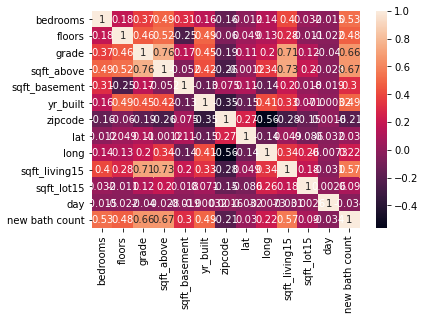

In [100]:
cmat = mcon.corr()
sns.heatmap(cmat,annot=True)
plt.show()

# Linear Regression 

In [101]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(mcon)
x_normalized = transformer.transform(mcon)
print(x_normalized.shape)

(21596, 13)


In [102]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(mdis)
encoded = encoder.transform(mdis).toarray()

In [103]:
encodeddf = pd.DataFrame(encoded)

In [104]:
X = np.concatenate((x_normalized,encodeddf),axis=1)

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=10000)

In [106]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

0.7045903101936455

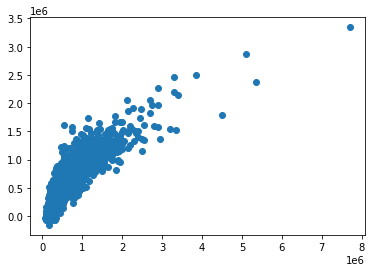

In [107]:
plt.scatter(x=y_test,y=predictions)

# KNeighbors Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(x_train,y_train)
predictions  = model.predict(x_test)
score = model.score(x_test,y_test)
lm = linear_model.LinearRegression()
model1 = lm.fit(x_train,y_train)
r2_score(y_test, predictions)

0.5388044581716877

# MLP Regressor

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
x,y = make_regression(n_samples = 21596,random_state=1)
x_train,x_test,y_train,y_test = train_test_split(x,target,random_state=1)
regr=MLPRegressor(random_state=1,max_iter=1200).fit(x_train,y_train)
regr.predict(x_test[:2])
regr.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.021012674962856526

# Logistic Regression

### Looking for normalization in numerical data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


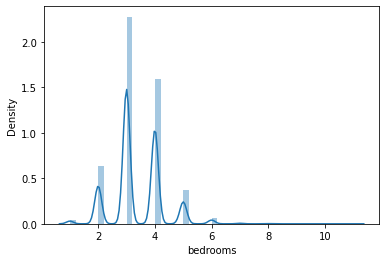

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


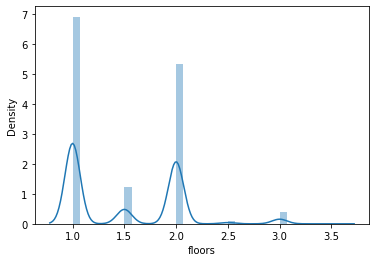

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


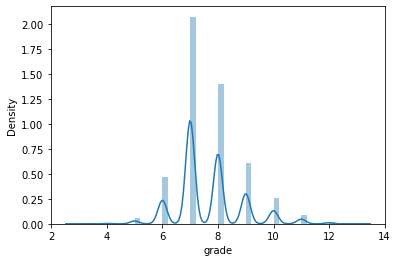

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


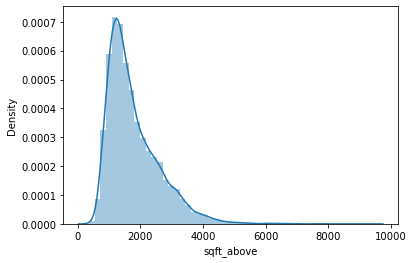

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


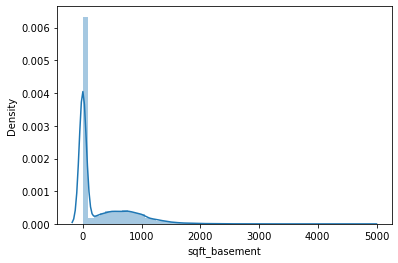

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


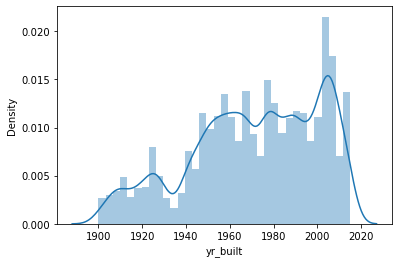

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


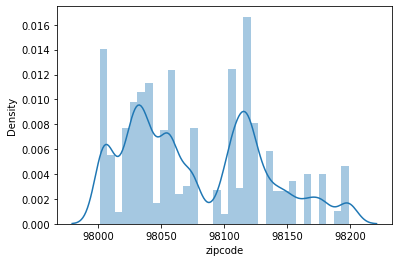

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


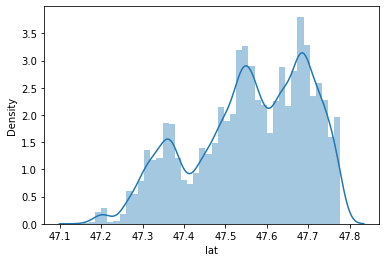

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


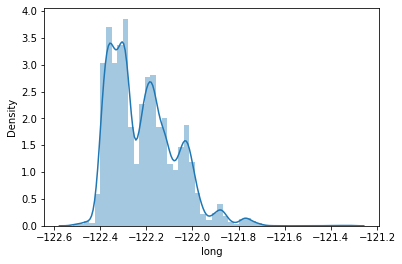

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


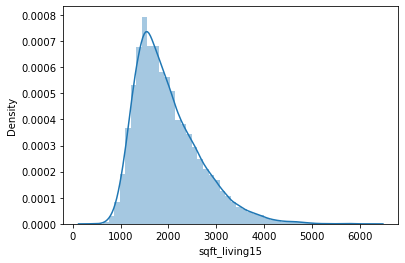

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


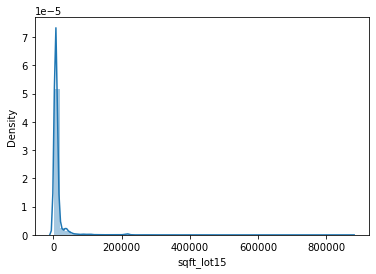

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


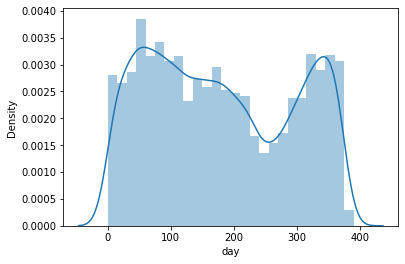

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


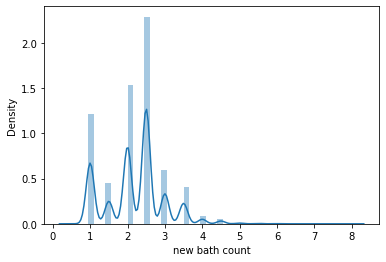

In [114]:
for col in mcon.columns:
    sns.distplot(mcon[col])
    plt.show()

In [120]:
transformer = Normalizer().fit(mcon)
x_normalized = transformer.transform(mcon)
x = pd.DataFrame(x_normalized)
categorical = pd.get_dummies(mdis, columns=['waterfront', 'view', 'condition', 'new reno'])
X = np.concatenate((x, categorical), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=100)

In [122]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs', max_iter= 1000,
                  multi_class='multinomial').fit(X_train, y_train)

In [ ]:
classification.score(X_test, y_test)